In [1]:
import os
os.chdir("C:/Users/user/Speech-to-Text/notebooks/ALFFA_PUBLIC/ASR/AMHARIC")
os.listdir()

['data', 'kaldi-script', 'lang', 'lm', 'models', 'my_app.log', 'README.md']

In [2]:
import os
import librosa   #for audio processing
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def tran_loader(filename):
  name_to_text = {}
  with open (filename, encoding="utf-8")as f:
    f.readline()
    for line in f:
      name=line.split("</s>")[1]
      name=name.replace('(', '')
      name=name.replace(')', '')
      name=name.replace('\n','')
      name=name.replace(' ','')
      text=line.split("</s>")[0]
      text=text.replace("<s>","")
      name_to_text[name]=text
    return name_to_text

In [4]:
transcription=tran_loader("C:/Users/user/Speech-to-Text/notebooks/ALFFA_PUBLIC/ASR/AMHARIC/data/train/trsTrain.txt")

In [5]:
transcription

{'tr_2_tr01002': ' የተ ለቀቁት ምርኮኞች በ አካባቢያቸው ሰላማዊ ኑሮ እንዲ ኖሩ የ ትራንስፖርት ና መጓጓዣ ገንዘብ ተሰጥቷ ቸው መሸኘታቸው ን አመልክቶ በ የ ዞ ናቸው እንደ ደረሱ መቃቋሚያ እንደሚ ሰጣቸው ም አስ ታውቋል ',
 'tr_3_tr01003': ' በ አዲስ አበባው ስታዲየም በ ተካሄዱ ት ሁለት ግጥሚያ ዎች በ መጀመሪያ የ ተገናኙ ት መድን ና ሙገር ሲሚንቶ ሲ ሆኑ በ ውጤቱ ም ሶስት ለ ሶስት ተለያይ ተዋል ',
 'tr_4_tr01004': ' ወሬው ን ወሬ ያደረጉ ምስጢረ ኞች ናቸው ',
 'tr_5_tr01005': ' ኢትዮጵያዊ ቷ በ ብሄራዊ ባህላዊ አለባበስ ከ አለም አንደኝነት ን ተቀዳጀ ች ',
 'tr_6_tr01006': ' ከ ትምክህት እንዳይ ቆጠር ብን እንጂ በ አለም ታሪክ ውስጥ በ ነጮች ያል ተረገጠ ች አገር ኢትዮጵያ ና ት ',
 'tr_7_tr01007': ' እህቶቹ የኤርትራ ዜጐች ና የ ሻእቢያ ደጋፊዎች ናቸው ',
 'tr_8_tr01008': ' እናንተ ም መቀበሪያ እንዳ ታጡ ተጠንቀቁ ',
 'tr_9_tr01009': ' አንቶኔሊ በ አጼ ምንሊክ ፊት የ ፈጸመው ድፍረት በ ኢጣሊያ ን ምክር ቤት አስተ ቸው ',
 'tr_10_tr01010': ' ግን ወደ ኋላው ላይ ኢሳያስ እንደ ልማ ዳቸው ሁሉን ም የ መልከ ፍ ዲፕሎማሲ ያቸው እስራኤል ንም ያስ ወር ፋቸው ጀመር ',
 'tr_11_tr01011': ' ከ የ አቅጣጫ ው እየ ደረሷቸው ያሉ መረጃዎች አሳሳቢ ችግሮች እየ ደረሱ መሆናቸው ን የሚ ጠቁሙ መሆናቸው ን ፕሬዝዳንቱ ተናግረ ዋል ',
 'tr_12_tr01012': ' ከ ማወቁ በፊት እንደ ተበጠበጠ ገበያ እንዳይ በታተን ይህ ነው አጀንዳ ችን ሌላ አጀንዳ የ ለ ንም ',
 'tr_13_tr01013': ' ኢትዮጵያ ም ሰራዊቷ በ ኤርትራ እንደሚ 

In [16]:
def meta_data(trans, path ):
  target=[]
  features=[]
  filenames=[]
  duration_of_recordings=[]
  for k in trans:
    filename=path+k +".wav"
    filenames.append(filename)
    audio, fs = librosa.load(filename, sr=None)
    duration_of_recordings.append(float(len(audio)/fs))
   
    lable = trans[k]
    target.append(lable)
  return filenames, target,duration_of_recordings

In [17]:
filenames, target,duration_of_recordings = meta_data(transcription,'C:/Users/user/Speech-to-Text/notebooks/ALFFA_PUBLIC/ASR/AMHARIC/data/train/wav/')

In [18]:
len(filenames)

10874

In [19]:
import pandas as pd 
data=pd.DataFrame({'key': filenames,'text': target, 'duration':duration_of_recordings})

In [20]:
data.head()

key  \
0  C:/Users/user/Speech-to-Text/notebooks/ALFFA_P...   
1  C:/Users/user/Speech-to-Text/notebooks/ALFFA_P...   
2  C:/Users/user/Speech-to-Text/notebooks/ALFFA_P...   
3  C:/Users/user/Speech-to-Text/notebooks/ALFFA_P...   
4  C:/Users/user/Speech-to-Text/notebooks/ALFFA_P...   

                                                text  duration  
0   የተ ለቀቁት ምርኮኞች በ አካባቢያቸው ሰላማዊ ኑሮ እንዲ ኖሩ የ ትራንስ...    16.384  
1   በ አዲስ አበባው ስታዲየም በ ተካሄዱ ት ሁለት ግጥሚያ ዎች በ መጀመሪያ...    14.592  
2                         ወሬው ን ወሬ ያደረጉ ምስጢረ ኞች ናቸው      4.736  
3   ኢትዮጵያዊ ቷ በ ብሄራዊ ባህላዊ አለባበስ ከ አለም አንደኝነት ን ተቀዳ...     8.192  
4   ከ ትምክህት እንዳይ ቆጠር ብን እንጂ በ አለም ታሪክ ውስጥ በ ነጮች ያ...     8.704

In [21]:
data.describe()

duration
count  10874.000000
mean       6.631413
std        3.068505
min        1.792000
25%        4.352000
50%        5.760000
75%        8.320000
max       24.192000

In [22]:
data.duration.value_counts()

4.096     291
4.224     288
4.608     269
4.352     268
4.864     265
         ... 
21.120      1
18.048      1
18.560      1
20.480      1
21.632      1
Name: duration, Length: 152, dtype: int64

In [23]:
len(data)

10874

In [25]:
import pandas as pd 
data=pd.DataFrame({'key': filenames,'text': target, 'duration':duration_of_recordings})

In [26]:
data.head()

key  \
0  C:/Users/user/Speech-to-Text/notebooks/ALFFA_P...   
1  C:/Users/user/Speech-to-Text/notebooks/ALFFA_P...   
2  C:/Users/user/Speech-to-Text/notebooks/ALFFA_P...   
3  C:/Users/user/Speech-to-Text/notebooks/ALFFA_P...   
4  C:/Users/user/Speech-to-Text/notebooks/ALFFA_P...   

                                                text  duration  
0   የተ ለቀቁት ምርኮኞች በ አካባቢያቸው ሰላማዊ ኑሮ እንዲ ኖሩ የ ትራንስ...    16.384  
1   በ አዲስ አበባው ስታዲየም በ ተካሄዱ ት ሁለት ግጥሚያ ዎች በ መጀመሪያ...    14.592  
2                         ወሬው ን ወሬ ያደረጉ ምስጢረ ኞች ናቸው      4.736  
3   ኢትዮጵያዊ ቷ በ ብሄራዊ ባህላዊ አለባበስ ከ አለም አንደኝነት ን ተቀዳ...     8.192  
4   ከ ትምክህት እንዳይ ቆጠር ብን እንጂ በ አለም ታሪክ ውስጥ በ ነጮች ያ...     8.704

In [27]:
length_sent = []

for i in data['text']:
    length_sent.append(len(i))

In [28]:
data['Len_sent']=pd.DataFrame(length_sent)

In [29]:
data.head()

key  \
0  C:/Users/user/Speech-to-Text/notebooks/ALFFA_P...   
1  C:/Users/user/Speech-to-Text/notebooks/ALFFA_P...   
2  C:/Users/user/Speech-to-Text/notebooks/ALFFA_P...   
3  C:/Users/user/Speech-to-Text/notebooks/ALFFA_P...   
4  C:/Users/user/Speech-to-Text/notebooks/ALFFA_P...   

                                                text  duration  Len_sent  
0   የተ ለቀቁት ምርኮኞች በ አካባቢያቸው ሰላማዊ ኑሮ እንዲ ኖሩ የ ትራንስ...    16.384       129  
1   በ አዲስ አበባው ስታዲየም በ ተካሄዱ ት ሁለት ግጥሚያ ዎች በ መጀመሪያ...    14.592       103  
2                         ወሬው ን ወሬ ያደረጉ ምስጢረ ኞች ናቸው      4.736        27  
3   ኢትዮጵያዊ ቷ በ ብሄራዊ ባህላዊ አለባበስ ከ አለም አንደኝነት ን ተቀዳ...     8.192        50  
4   ከ ትምክህት እንዳይ ቆጠር ብን እንጂ በ አለም ታሪክ ውስጥ በ ነጮች ያ...     8.704        69

In [30]:
data.describe()

duration      Len_sent
count  10874.000000  10874.000000
mean       6.631413     56.971951
std        3.068505     28.733425
min        1.792000     12.000000
25%        4.352000     34.000000
50%        5.760000     49.000000
75%        8.320000     75.000000
max       24.192000    165.000000

In [31]:
data.duration.value_counts()

4.096     291
4.224     288
4.608     269
4.352     268
4.864     265
         ... 
21.120      1
18.048      1
18.560      1
20.480      1
21.632      1
Name: duration, Length: 152, dtype: int64

In [32]:
len(data)

10874

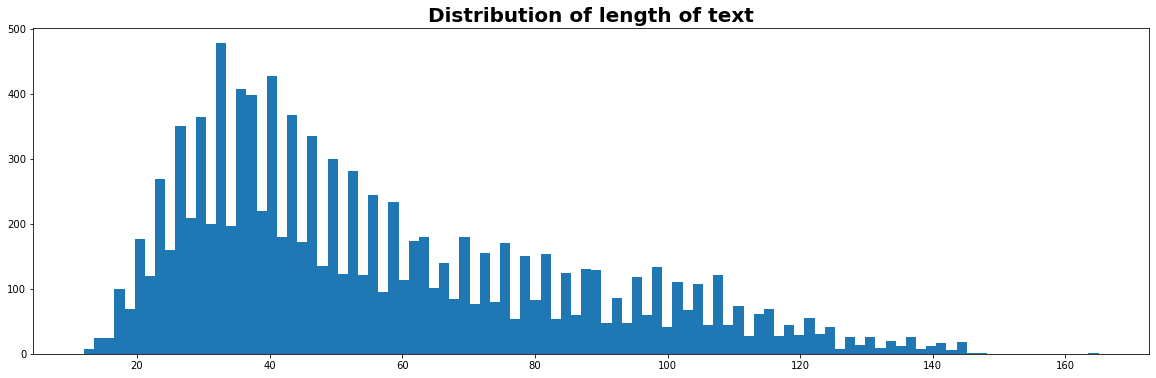

In [33]:
plt.figure(figsize=(20, 6))
plt.hist(np.array(length_sent), 100)
plt.title(f'Distribution of length of text', size=20, fontweight='bold')
plt.show();

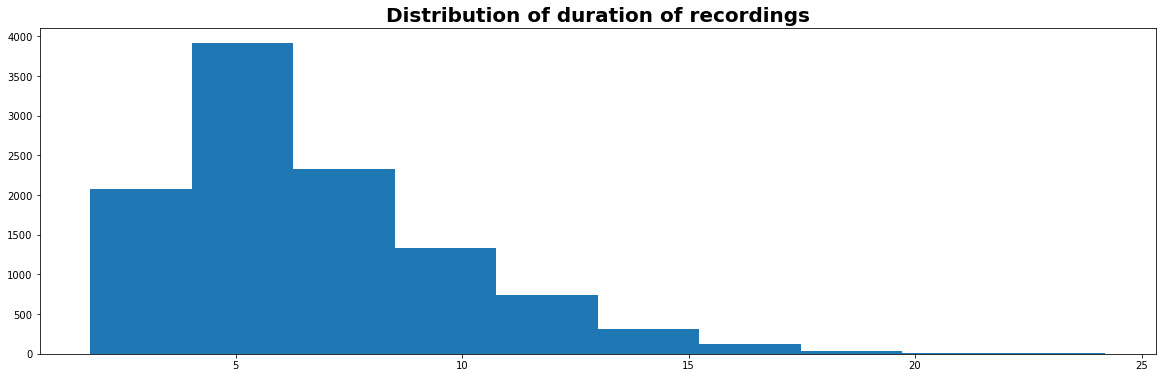

In [34]:
#distribution of the duration of recordings:
plt.figure(figsize=(20, 6))
plt.hist(np.array(data['duration']))
plt.title(f'Distribution of duration of recordings', size=20, fontweight='bold')
plt.show();

In [35]:
!pip install torchaudio

     ------------------------------------ 372.5/372.5 kB 386.2 kB/s eta 0:00:00
     -------------------------------------- 158.0/158.0 MB 1.8 MB/s eta 0:00:00


In [36]:
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")
class AudioUtils():
  # ----------------------------
  # Load an audio file. Return the audio as a array and rate
  # ----------------------------
  def opens(self, audio_file_loc, sr=22000):
    samples, sample_rate = librosa.load(audio_file_loc, sr=sr)
    return (samples, sample_rate)
  def play_audio(self, samples, sample_rate):
    return ipd.Audio(samples, rate=sample_rate)

In [37]:
open_audios = AudioUtils()

In [38]:
samples, sample_rate = open_audios.opens(data.key[0])

In [39]:
open_audios.play_audio(samples, sample_rate)

In [40]:
samples.shape

(360448,)

In [41]:
from numpy.lib.stride_tricks import as_strided
def spectrogram(samples, fft_length=256, sample_rate=2, hop_length=128):
    """
    Compute the spectrogram for a real signal.
    The parameters follow the naming convention of
    matplotlib.mlab.specgram

    Args:
        samples (1D array): input audio signal
        fft_length (int): number of elements in fft window
        sample_rate (scalar): sample rate
        hop_length (int): hop length (relative offset between neighboring
            fft windows).

    Returns:
        x (2D array): spectrogram [frequency x time]
        freq (1D array): frequency of each row in x

    Note:
        This is a truncating computation e.g. if fft_length=10,
        hop_length=5 and the signal has 23 elements, then the
        last 3 elements will be truncated.
    """
    assert not np.iscomplexobj(samples), "Must not pass in complex numbers"

    window = np.hanning(fft_length)[:, None]
    window_norm = np.sum(window**2)

    # The scaling below follows the convention of
    # matplotlib.mlab.specgram which is the same as
    # matlabs specgram.
    scale = window_norm * sample_rate

    trunc = (len(samples) - fft_length) % hop_length
    x = samples[:len(samples) - trunc]

    # "stride trick" reshape to include overlap
    nshape = (fft_length, (len(x) - fft_length) // hop_length + 1)
    nstrides = (x.strides[0], x.strides[0] * hop_length)
    x = as_strided(x, shape=nshape, strides=nstrides)

    # window stride sanity check
    assert np.all(x[:, 1] == samples[hop_length:(hop_length + fft_length)])

    # broadcast window, compute fft over columns and square mod
    x = np.fft.rfft(x * window, axis=0)
    x = np.absolute(x)**2

    # scale, 2.0 for everything except dc and fft_length/2
    x[1:-1, :] *= (2.0 / scale)
    x[(0, -1), :] /= scale

    freqs = float(sample_rate) / fft_length * np.arange(x.shape[0])

    return x, freqs

In [42]:
spe_samples,frequency=spectrogram(samples)

In [43]:
frequency

array([0.       , 0.0078125, 0.015625 , 0.0234375, 0.03125  , 0.0390625,
       0.046875 , 0.0546875, 0.0625   , 0.0703125, 0.078125 , 0.0859375,
       0.09375  , 0.1015625, 0.109375 , 0.1171875, 0.125    , 0.1328125,
       0.140625 , 0.1484375, 0.15625  , 0.1640625, 0.171875 , 0.1796875,
       0.1875   , 0.1953125, 0.203125 , 0.2109375, 0.21875  , 0.2265625,
       0.234375 , 0.2421875, 0.25     , 0.2578125, 0.265625 , 0.2734375,
       0.28125  , 0.2890625, 0.296875 , 0.3046875, 0.3125   , 0.3203125,
       0.328125 , 0.3359375, 0.34375  , 0.3515625, 0.359375 , 0.3671875,
       0.375    , 0.3828125, 0.390625 , 0.3984375, 0.40625  , 0.4140625,
       0.421875 , 0.4296875, 0.4375   , 0.4453125, 0.453125 , 0.4609375,
       0.46875  , 0.4765625, 0.484375 , 0.4921875, 0.5      , 0.5078125,
       0.515625 , 0.5234375, 0.53125  , 0.5390625, 0.546875 , 0.5546875,
       0.5625   , 0.5703125, 0.578125 , 0.5859375, 0.59375  , 0.6015625,
       0.609375 , 0.6171875, 0.625    , 0.6328125, 

In [44]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
def plot_spectrogram_feature(vis_spectrogram_feature):
    # plot the normalized spectrogram
    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(111)
    im = ax.imshow(vis_spectrogram_feature, cmap=plt.cm.jet, aspect='auto')
    plt.title('Spectrogram')
    plt.ylabel('Time')
    plt.xlabel('Frequency')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.show()

In [45]:
import librosa.display

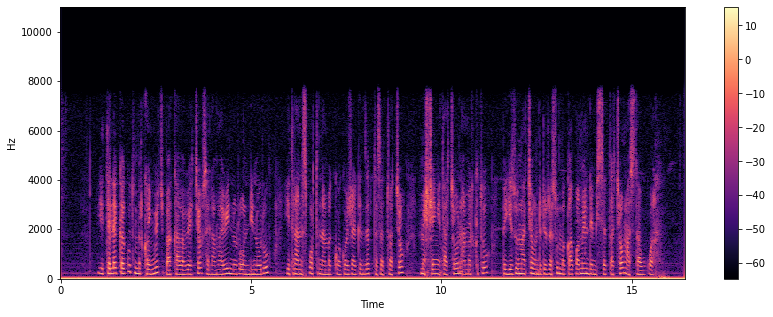

In [46]:
X = librosa.stft(samples)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()

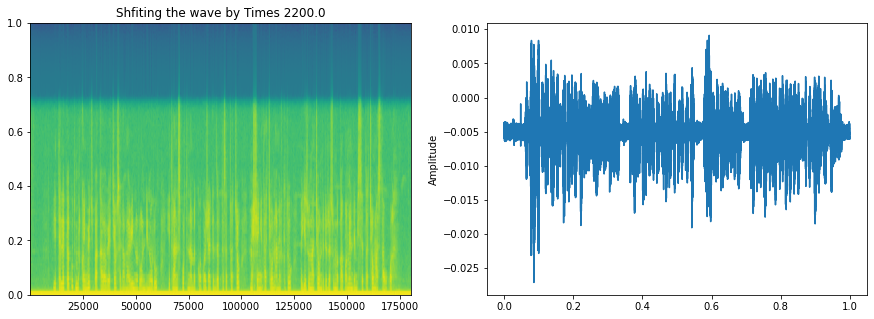

In [47]:
def plot_spec(data:np.array,sr:int) -> None:
  '''
  Function for plotting spectrogram along with amplitude wave graph
  '''
  
  fig, ax = plt.subplots(1,2,figsize=(15,5))
  ax[0].title.set_text(f'Shfiting the wave by Times {sr/10}')
  ax[0].specgram(data,Fs=2)
  ax[1].set_ylabel('Amplitude')
  ax[1].plot(np.linspace(0,1,len(data)), data)

wav_roll = np.roll(samples,int(sample_rate/100))
plot_spec(data=wav_roll,sr=sample_rate)
ipd.Audio(wav_roll,rate=sample_rate)

In [48]:
df = data[0:100].copy()

In [49]:
import math, random
import torch
import torchaudio
from torchaudio import transforms
from IPython.display import Audio
import IPython.display as ipd

class AudioUtil():
  
  # Load an audio file. Return the signal as a tensor and the sample rate
  
  @staticmethod
  def open(audio_file):
    sig, sr = torchaudio.load(audio_file)
    return (sig, sr)

  def pad_trunc(aud, max_ms):
    sig, sr = aud
    num_rows, sig_len = sig.shape
    max_len = sr//1000 * max_ms

    if (sig_len > max_len):
      # Truncate the signal to the given length
      sig = sig[:,:max_len]

    elif (sig_len < max_len):
      # Length of padding to add at the beginning and end of the signal
      pad_begin_len = random.randint(0, max_len - sig_len)
      pad_end_len = max_len - sig_len - pad_begin_len
      # Pad with 0s
      pad_begin = torch.zeros((num_rows, pad_begin_len))
      pad_end = torch.zeros((num_rows, pad_end_len))

      sig = torch.cat((pad_begin, sig, pad_end), 1)

    return (sig, sr)
  
  def resize_all(self, df, sm=10000):
    sig_list = []
    sr_list = []
    for i in range(len(df)):
      audio_path = df['key'][i]
      aud = AudioUtil.open(audio_path)
      sig, sr = AudioUtil.pad_trunc(aud,sm)
      sig_list.append(sig)
      sr_list.append(sr)
    return sig_list, sr_list

  def play_audio(self, samples, sample_rate):
      return ipd.Audio(samples, rate=sample_rate)


In [50]:
audio_load = AudioUtil()
sig_list, sr_list = audio_load.resize_all(df)

In [51]:
df['sig'] = sig_list
df['sr'] = sr_list

In [52]:
df.head()

key  \
0  C:/Users/user/Speech-to-Text/notebooks/ALFFA_P...   
1  C:/Users/user/Speech-to-Text/notebooks/ALFFA_P...   
2  C:/Users/user/Speech-to-Text/notebooks/ALFFA_P...   
3  C:/Users/user/Speech-to-Text/notebooks/ALFFA_P...   
4  C:/Users/user/Speech-to-Text/notebooks/ALFFA_P...   

                                                text  duration  Len_sent  \
0   የተ ለቀቁት ምርኮኞች በ አካባቢያቸው ሰላማዊ ኑሮ እንዲ ኖሩ የ ትራንስ...    16.384       129   
1   በ አዲስ አበባው ስታዲየም በ ተካሄዱ ት ሁለት ግጥሚያ ዎች በ መጀመሪያ...    14.592       103   
2                         ወሬው ን ወሬ ያደረጉ ምስጢረ ኞች ናቸው      4.736        27   
3   ኢትዮጵያዊ ቷ በ ብሄራዊ ባህላዊ አለባበስ ከ አለም አንደኝነት ን ተቀዳ...     8.192        50   
4   ከ ትምክህት እንዳይ ቆጠር ብን እንጂ በ አለም ታሪክ ውስጥ በ ነጮች ያ...     8.704        69   

                                                 sig     sr  
0  [[tensor(-0.0051), tensor(-0.0052), tensor(-0....  16000  
1  [[tensor(0.), tensor(0.), tensor(0.), tensor(0...  16000  
2  [[tensor(0.), tensor(0.), tensor(0.), tensor(0...  16000  
3  [[tensor(0.), tensor(0.), tensor(0.), tensor(0...  16000  
4  [[tensor(0.), tensor(0.), tensor(0.), tensor(0...  16000

In [53]:
audio_load.play_audio(df['sig'][0], df['sr'][0])